# Guided project

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

In [1]:
import pandas as pd
import numpy as np

Read two separate surveys

In [2]:
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [5]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [6]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [7]:
dete_survey.isnull().sum()


ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [8]:
dete_survey['Aboriginal'].value_counts()

Yes    16
Name: Aboriginal, dtype: int64

dete survey has clearer set of data, 822 of bearly anything. Dates are not dates
Ids, do they match

In [9]:
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')


In [10]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [11]:
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

In [12]:
dete_survey_updated.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Work life balance,Workload,None of the above,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


Less fields now in the data frames

In [13]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.lower().str.strip()

In [14]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [15]:
new_col = {'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}


In [17]:
tafe_survey_updated=tafe_survey_updated.rename(columns=new_col)

In [18]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [19]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


name changes of columns in new col for tafe survey

In [20]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [21]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [22]:
dete_resignations=dete_survey_updated.copy()
tafe_resignations=tafe_survey_updated.copy()

In [23]:
dete_resignations['separationtype'] = dete_resignations['separationtype'].str[0:11]

In [24]:
dete_resignations['separationtype'].value_counts()

Resignation    311
Age Retirem    285
Voluntary E     67
Ill Health      61
Other           49
Contract Ex     34
Termination     15
Name: separationtype, dtype: int64

In [25]:

dete_resignations = dete_resignations[dete_resignations['separationtype'] == "Resignation"]

In [26]:
dete_resignations['separationtype'].value_counts()

Resignation    311
Name: separationtype, dtype: int64

In [27]:
tafe_resignations = tafe_resignations[tafe_resignations['separationtype'] == "Resignation"]

In [28]:
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

In [29]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
2010         1
07/2012      1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64

In [30]:
dete_resignations['cease_date'].str.split('/').str.get(-1).value_counts()

2013    146
2012    129
2014     22
2010      2
2006      1
Name: cease_date, dtype: int64

In [31]:
dete_resignations['cease_date']=dete_resignations['cease_date'].str.split('/').str.get(-1)

In [32]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006      1
2010      2
2012    129
2013    146
2014     22
Name: cease_date, dtype: int64

In [33]:
dete_resignations['cease_date']=dete_resignations['cease_date'].astype('float')

In [34]:
dete_resignations['cease_date'].value_counts().sort_index(ascending=True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
Name: cease_date, dtype: int64

In [35]:
tafe_resignations['cease_date'].value_counts().sort_index(ascending=True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

Years ok, except maybe 2006 

In [36]:
dete_resignations['role_start_date'].value_counts().sort_index(ascending=True)

200.0      1
1976.0     2
1980.0     1
1982.0     1
1986.0     1
1987.0     2
1988.0     3
1989.0     5
1990.0     1
1991.0     1
1992.0     4
1993.0     3
1994.0     2
1996.0     3
1997.0     5
1998.0     4
1999.0     6
2000.0     1
2001.0     2
2002.0     7
2003.0     6
2004.0    10
2005.0     9
2006.0     7
2007.0    24
2008.0    21
2009.0    18
2010.0    27
2011.0    33
2012.0    37
2013.0    24
Name: role_start_date, dtype: int64

In [37]:
tafe_resignations['institute_service'].value_counts().sort_index(ascending=True)

1-2                   64
11-20                 26
3-4                   63
5-6                   33
7-10                  21
Less than 1 year      73
More than 20 years    10
Name: institute_service, dtype: int64

In [38]:
dete_resignations['institute_service']=tafe_resignations['cease_date']-dete_resignations['role_start_date']

In [39]:
dete_resignations['institute_service'].value_counts().sort_index(ascending=True)

-2.0      1
-1.0     13
 0.0     16
 1.0     13
 2.0     12
 3.0     15
 4.0      6
 5.0      4
 6.0      5
 7.0      2
 8.0      2
 9.0      2
 10.0     3
 11.0     1
 12.0     3
 13.0     3
 14.0     1
 15.0     2
 16.0     1
 17.0     1
 19.0     2
 20.0     1
 22.0     2
 23.0     3
 25.0     1
 28.0     1
 30.0     1
 35.0     1
Name: institute_service, dtype: int64

Seems ok except of couple of errors < less than null

In [40]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts().sort_index(ascending=True)

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [41]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts().sort_index(ascending=True)

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [42]:
def update_vals(val):
    if pd.isnull(val):
        return(np.nan)
    elif val == '-':
        return(False)
    else:
        return(True)

# to true - false 

factors = ['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
tafe_resignations[factors]=tafe_resignations[factors].applymap(update_vals)
tafe_resignations['dissatisfied']= tafe_resignations[factors].any(axis=1,skipna=False)

tafe_resignations_up=tafe_resignations.copy()

In [43]:
dete_resignations['dissatisfied'] = dete_resignations[['job_dissatisfaction']].any(axis=1,skipna=False)

dete_resignations_up=dete_resignations.copy()

dissatisfied includes tru/false values of satisfactions

In [44]:
dete_resignations['institute']="DETE"
tafe_resignations['institute']="TAFE"

In [45]:
combined=pd.concat([dete_resignations,tafe_resignations],ignore_index=True)

In [46]:
combined['institute_service']=combined['institute_service'].astype('str')
combined['institute_service']=combined['institute_service'].str.replace('3-4', '3.5').str.replace('7-10', '8.5').str.replace('1-2', '1.5').str.replace('Less than 1 year', '0.5').str.replace('11-20', '15').str.replace('5-6', '5.5').str.replace('More than 20 years', '25.0')
combined['institute_service']=combined['institute_service'].astype('float')

def service_cat(val):
    if pd.isnull(val):
        return(np.nan)
    elif val < 3:
        return('New')
    elif val < 7:
        return('Experienced')
    elif val < 11:
        return('Established')
    else:
        return('Veteran')

combined['service_cat']=combined['institute_service'].apply(service_cat)
combined['dissatisfied']=combined['dissatisfied'].fillna(False)


In [47]:
combined_updated=combined.dropna(thresh=400, axis=1)


Now table seems to be small enough

In [48]:
combined_updated['institute_service'].unique()

array([ 4. , 13. ,  0. ,  2. ,  nan, 28. ,  1. , 12. , -2. , -1. , 30. ,
       16. , 17. ,  3. ,  7. , 35. , 22. ,  6. ,  8. , 10. , 19. , 15. ,
        5. , 23. , 14. , 20. , 11. ,  9. , 25. ,  3.5,  8.5,  1.5,  0.5,
       11.5,  5.5])

In [49]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    519
True     132
Name: dissatisfied, dtype: int64

New cat

# And the results

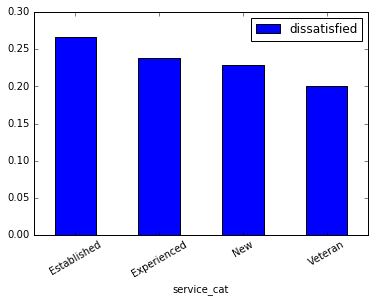

In [50]:
import matplotlib as plot
%matplotlib inline 
pv_incomes=combined_updated.pivot_table('dissatisfied', 'service_cat')
pv_incomes.plot(kind='bar', rot=30)


Straight line on satisfaction

Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

Straight line, the longer employed the happier you are